In [1]:
import numpy as np
from scipy import ndimage
from time import time
import pandas as pd
from skimage import measure
from skimage import io
import ImageAnalysis
import Morphology

from pathlib import Path
import pathlib
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize_3d
import sknw
import networkx as nx

In [2]:
setToUse = 4

root_path = ""
if setToUse == 1:
    root_path = r"/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/Mitochondria/2020-02-06/Pre-processed/"
elif setToUse == 2:
    root_path = r"/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/Mitochondria/2020-03-12/Pre-processed/"
elif setToUse == 3:
    root_path = r"/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/Mitochondria/2022-08-24/Pre-processed_CLAHE_global_otsu/"
elif setToUse == 4:
    root_path = r"/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/Mitochondria/2022-08-24/Pre-processed/"

p = Path(root_path).glob('**/*')
all_files = [x for x in p if x.is_file()]

for f in all_files:
    print("\"{}\": ( ,  ),".format(f))
    # image = io.imread(f)
    # print("\"{}\": (1, {}),".format(f, image.shape[0]))


minStructureVolume = 40

start_end_frame = {}
if setToUse == 1:
    # For 2020-02-06
    start_end_frame = {
        "Cntr A_3-Deconvolution (defaults)-01.tif": ( 3, 10 ),
        "Cntr A_5-Deconvolution (defaults)-02.tif": ( 3, 9 ),
        # "Cntr H_2-Deconvolution (defaults)-01.tif": ( ,  ), # super bright spot
        "Cntr H_3-Deconvolution (defaults)-02.tif": ( 6, 12 ),
        # "Cntr H_4-Deconvolution (defaults)-03-Deconvolution (defaults)-04.tif": ( ,  ), #twice deconvolved?
        "Cntr H_5-Deconvolution (defaults)-05.tif": ( 4, 17 ),
        "Cntr H_6-Deconvolution (defaults)-06.tif": ( 7, 21 ),
        "FFA B_1-Deconvolution (defaults)-07.tif": ( 2, 9 ),
        "FFA B_2-Deconvolution (defaults)-08.tif": ( 2, 9 ),
        "FFA B_3-Deconvolution (defaults)-09.tif": ( 4, 15 ), # Very noisy
        "FFA B_5-Deconvolution (defaults)-11.tif": ( 5, 17 ),
        "FFA B_6-Deconvolution (defaults)-12.tif": ( 5, 16 ),
        "FFA B_7-Deconvolution (defaults)-13.tif": ( 2, 14 ),
        "FFA B_8-Deconvolution (defaults)-14.tif": ( 6, 17 ),
        "FFA G_1-Deconvolution (defaults)-15.tif": ( 2, 16 ),
        "FFA G_3-Deconvolution (defaults)-17.tif": ( 5, 17 ),
        "FFA G_4-Deconvolution (defaults)-18.tif": ( 7, 18 ),
        "FFA G_5-Deconvolution (defaults)-19.tif": ( 6, 17 ),
        "FFA G_6-Deconvolution (defaults)-20.tif": ( 8, 16 ),
        "FFA+Ins  C_1-Deconvolution (defaults)-22.tif": ( 5, 28 ),
        "FFA+Ins  C_2-Deconvolution (defaults)-23.tif": ( 4, 18 ),
        "FFA+Ins  C_3-Deconvolution (defaults)-24.tif": ( 5, 17 ),
        "FFA+Ins  C_4-Deconvolution (defaults)-25.tif": ( 4, 11 ),
        "FFA+Ins  C_5-Deconvolution (defaults)-26.tif": ( 6, 16 ),
        "FFA+Ins  C_6-Deconvolution (defaults)-27.tif": ( 6, 17 ),
        "FFA+Ins  C_7-Deconvolution (defaults)-28.tif": ( 7, 19 ), # quite hazy
        "FFA+Ins  C_8-Deconvolution (defaults)-29.tif": ( 9, 19 ),
        "FFA+Ins  C_9-Deconvolution (defaults)-30.tif": ( 9, 22 ), # quite hazy
        "FFA+Ins  F_1-Deconvolution (defaults)-31.tif": ( 6, 20 ),
        "FFA+Ins  F_2-Deconvolution (defaults)-32.tif": ( 6, 23 ), # quite hazy
        "FFA+Ins  F_3-Deconvolution (defaults)-33.tif": ( 5, 19 ),
        "FFA+Ins  F_4-Deconvolution (defaults)-34.tif": ( 6, 21 ),
        "FFA+Ins  F_5-Deconvolution (defaults)-35.tif": ( 6, 15 ),
        "Ins  D_1-Deconvolution (defaults)-36.tif": ( 9, 20 ),
        "Ins  D_2-Deconvolution (defaults)-37.tif": ( 6, 18 ),
        "Ins  D_3-Deconvolution (defaults)-38.tif": ( 13, 26 ),
        "Ins  D_4-Deconvolution (defaults)-39.tif": ( 8, 20 ),
        "Ins  D_5-Deconvolution (defaults)-40.tif": ( 5, 16 ), # a bit dim
        "Ins  D_6-Deconvolution (defaults)-41.tif": ( 4, 19 ),
        "Ins  D_7-Deconvolution (defaults)-42.tif": ( 5, 20 ),
        "Ins  D_8-Deconvolution (defaults)-43.tif": ( 7, 21 ),
        "Ins  E_1-Deconvolution (defaults)-44.tif": ( 5, 24 ), # nice clean sample
        "Ins  E_2-Deconvolution (defaults)-45.tif": ( 5, 20 ),
        "Ins  E_3-Deconvolution (defaults)-46.tif": ( 5, 22 ), # hazy spot drifting around
        "Ins  E_4-Deconvolution (defaults)-47.tif": ( 3, 19 ),
        "Ins  E_5-Deconvolution (defaults)-48.tif": ( 8, 22 ),
        "Ins  E_6-Deconvolution (defaults)-49.tif": ( 6, 18 ),
        "Ins  E_7-Deconvolution (defaults)-50.tif": ( 6, 15 ),
        "Ins  E_8-Deconvolution (defaults)-51.tif": ( 4, 18 )
    }

    z_steps = {
        "Cntr A_1-Z-Stack Alignment-01.tif":	1000,
        "Cntr A_3-Deconvolution (defaults)-01.tif":	1000,
        "Cntr A_3_1.tif":	1000,
        "Cntr A_5 mito only.tif":	1000,
        "Cntr A_5-Deconvolution (defaults)-02.tif":	1000,
        "Cntr H_2-Deconvolution (defaults)-01.tif":	250,
        "Cntr H_3-Deconvolution (defaults)-02.tif":	250,
        "Cntr H_4-Deconvolution (defaults)-03-Deconvolution (defaults)-04.tif":	250,
        "Cntr H_5-Deconvolution (defaults)-05.tif":	250,
        "Cntr H_6-Deconvolution (defaults)-06.tif":	250,
        "FFA B_1-Deconvolution (defaults)-07.tif":	1000,
        "FFA B_2-Deconvolution (defaults)-08.tif":	1000,
        "FFA B_3-Deconvolution (defaults)-09.tif":	300,
        "FFA B_5-Deconvolution (defaults)-11.tif":	300,
        "FFA B_6-Deconvolution (defaults)-12.tif":	300,
        "FFA B_7-Deconvolution (defaults)-13.tif":	300,
        "FFA B_8-Deconvolution (defaults)-14.tif":	300,
        "FFA G_1-Deconvolution (defaults)-15.tif":	250,
        "FFA G_3-Deconvolution (defaults)-17.tif":	250,
        "FFA G_4-Deconvolution (defaults)-18.tif":	250,
        "FFA G_5-Deconvolution (defaults)-19.tif":	250,
        "FFA G_6-Deconvolution (defaults)-20.tif":	250,
        "FFA+Ins  C_1-Deconvolution (defaults)-22.tif":	300,
        "FFA+Ins  C_2-Deconvolution (defaults)-23.tif":	300,
        "FFA+Ins  C_3-Deconvolution (defaults)-24.tif":	300,
        "FFA+Ins  C_4-Deconvolution (defaults)-25.tif":	300,
        "FFA+Ins  C_5-Deconvolution (defaults)-26.tif":	250,
        "FFA+Ins  C_6-Deconvolution (defaults)-27.tif":	250,
        "FFA+Ins  C_7-Deconvolution (defaults)-28.tif":	250,
        "FFA+Ins  C_8-Deconvolution (defaults)-29.tif":	250,
        "FFA+Ins  C_9-Deconvolution (defaults)-30.tif":	250,
        "FFA+Ins  F_1-Deconvolution (defaults)-31.tif":	250,
        "FFA+Ins  F_2-Deconvolution (defaults)-32.tif":	250,
        "FFA+Ins  F_3-Deconvolution (defaults)-33.tif":	250,
        "FFA+Ins  F_4-Deconvolution (defaults)-34.tif":	250,
        "FFA+Ins  F_5-Deconvolution (defaults)-35.tif":	250,
        "Ins  D_1-Deconvolution (defaults)-36.tif":	250,
        "Ins  D_2-Deconvolution (defaults)-37.tif":	250,
        "Ins  D_3-Deconvolution (defaults)-38.tif":	250,
        "Ins  D_4-Deconvolution (defaults)-39.tif":	250,
        "Ins  D_5-Deconvolution (defaults)-40.tif":	250,
        "Ins  D_6-Deconvolution (defaults)-41.tif":	250,
        "Ins  D_7-Deconvolution (defaults)-42.tif":	250,
        "Ins  D_8-Deconvolution (defaults)-43.tif":	250,
        "Ins  E_1-Deconvolution (defaults)-44.tif":	250,
        "Ins  E_2-Deconvolution (defaults)-45.tif":	250,
        "Ins  E_3-Deconvolution (defaults)-46.tif":	250,
        "Ins  E_4-Deconvolution (defaults)-47.tif":	250,
        "Ins  E_5-Deconvolution (defaults)-48.tif":	250,
        "Ins  E_6-Deconvolution (defaults)-49.tif":	250,
        "Ins  E_7-Deconvolution (defaults)-50.tif":	250,
        "Ins  E_8-Deconvolution (defaults)-51.tif":	250
    }
elif setToUse == 2:
    # For 2020-03-12
    start_end_frame = {
    "A1_Cntr_1-Deconvolution (defaults)-01.tif": ( 8, 19 ), 
    "A1_Cntr_2-Deconvolution (defaults)-02.tif": ( 8, 26), 
    "A1_Cntr_3-Deconvolution (defaults)-03.tif": ( 3, 12), 
    "A1_Cntr_5-Deconvolution (defaults)-05.tif": ( 8, 26),# good sample
    "A1_Cntr_6-Deconvolution (defaults)-04.tif": ( 8, 26),# good sample 
    "A1_Cntr_7-Deconvolution (defaults)-06.tif": ( 8, 26),# good sample 
    "A2_FFA_1-Deconvolution (defaults)-07.tif": ( 8, 26), 
    "A2_FFA_2-Deconvolution (defaults)-08.tif": ( 5, 19), 
    "A2_FFA_3-Deconvolution (defaults)-09.tif": ( 5, 19), 
    "A2_FFA_4-Deconvolution (defaults)-10.tif": ( 8, 26), 
    "A2_FFA_5-Deconvolution (defaults)-11.tif": ( 5, 19), 
    "A2_FFA_6-Deconvolution (defaults)-12.tif": ( 8, 20), # bad sample 
    "A2_FFA_7-Deconvolution (defaults)-13.tif": ( 5, 19), 
    "A2_FFA_8-Deconvolution (defaults)-14.tif": ( 5, 23), # weird bright spots 
    "A3_ins_1-Deconvolution (defaults)-15.tif": ( 10, 28), 
    "A3_ins_2-Deconvolution (defaults)-16.tif": ( 7, 21), 
    "A3_ins_3-Deconvolution (defaults)-18.tif": ( 13, 27),  # hazy
    "A3_ins_5-Deconvolution (defaults)-19.tif": ( 8, 26), 
    "A3_ins_6-Deconvolution (defaults)-20.tif": ( 7, 25), 
    "A4_ins+ffa_1-Deconvolution (defaults)-21.tif": ( 7, 25), 
    "A4_ins+ffa_2-Deconvolution (defaults)-22.tif": ( 6, 20), 
    "A4_ins+ffa_3-Deconvolution (defaults)-23.tif": ( 6, 20), 
    "A4_ins+ffa_4-Deconvolution (defaults)-24.tif": ( 10, 23), # bad sample 
    "A4_ins+ffa_5-Deconvolution (defaults)-25.tif": ( 5, 23), 
    "A4_ins+ffa_6-Deconvolution (defaults)-26.tif": ( 9, 27), 
    "B1_Cntr_1-Deconvolution (defaults)-27.tif": ( 6, 24), 
    "B1_Cntr_2-Deconvolution (defaults)-28.tif": ( 7, 24), 
    "B1_Cntr_3-Deconvolution (defaults)-29.tif": ( 6, 24), 
    "B1_Cntr_6-Deconvolution (defaults)-30.tif": ( 5, 20), 
    "B2_FFA_1-Deconvolution (defaults)-31.tif": ( 11, 30), 
    "B3_ins_1-Deconvolution (defaults)-32.tif": ( 10, 29), 
    "B3_ins_2-Deconvolution (defaults)-34.tif": ( 6, 22), 
    "B3_ins_3-Deconvolution (defaults)-35.tif": ( 6, 22), 
    "B3_ins_6-Deconvolution (defaults)-36.tif": ( 6, 22), 
    "B4_ins+ffa_1-Deconvolution (defaults)-37.tif": ( 10, 29) 
    }
elif setToUse == 3:
    start_end_frame = {
        "A1-cntr_1-Deconvolution (defaults)-01.tif": (1, 19),
"A1-cntr_1-Deconvolution (defaults)-02.tif": (1, 19),
"A1-cntr_1-Deconvolution (defaults)-03.tif": (1, 19),
"A1-cntr_10-Deconvolution (defaults)-12.tif": (1, 18),
"A1-cntr_10-Deconvolution (defaults)-13.tif": (1, 18),
"A1-cntr_2-Change Scaling-02-Deconvolution (defaults)-04.tif": (1, 20),
"A1-cntr_2-Change Scaling-02-Deconvolution (defaults)-05.tif": (1, 20),
"A1-cntr_2-Deconvolution (defaults)-01.tif": (1, 20),
"A1-cntr_6-Deconvolution (defaults)-08.tif": (1, 18),
"A1-cntr_6-Deconvolution (defaults)-09.tif": (1, 18),
"A1-cntr_7 mitose-Deconvolution (defaults)-09.tif": (1, 17),
"A1-cntr_7 mitose-Deconvolution (defaults)-10.tif": (1, 17),
"A1-cntr_8-Deconvolution (defaults)-10.tif": (1, 17),
"A1-cntr_8-Deconvolution (defaults)-11.tif": (1, 17),
"A1-cntr_9-Deconvolution (defaults)-11.tif": (1, 19),
"A1-cntr_9-Deconvolution (defaults)-12.tif": (1, 19),
"A2-cntr_1-Deconvolution (defaults)-13.tif": (1, 18),
"A2-cntr_1-Deconvolution (defaults)-14.tif": (1, 18),
"A2-cntr_2-Deconvolution (defaults)-15.tif": (1, 14),
"A2-cntr_3-Deconvolution (defaults)-16.tif": (1, 19),
"B1-ins_1-Deconvolution (defaults)-17.tif": (1, 16),
"B1-ins_10-Deconvolution (defaults)-26.tif": (1, 15),
"B1-ins_11-Deconvolution (defaults)-27.tif": (1, 14),
"B1-ins_2-Deconvolution (defaults)-18.tif": (1, 17),
"B1-ins_3-Deconvolution (defaults)-19.tif": (1, 17),
"B1-ins_4-Deconvolution (defaults)-20.tif": (1, 19),
"B1-ins_5-Deconvolution (defaults)-21.tif": (1, 16),
"B1-ins_6-Deconvolution (defaults)-22.tif": (1, 17),
"B1-ins_7-Deconvolution (defaults)-23.tif": (1, 17),
"B1-ins_8-Deconvolution (defaults)-24.tif": (1, 17),
"B1-ins_9-Deconvolution (defaults)-25.tif": (1, 15),
"B2-ins_1-Deconvolution (defaults)-28.tif": (1, 18),
"B2-ins_10-Deconvolution (defaults)-37.tif": (1, 13),
"B2-ins_2-Deconvolution (defaults)-29.tif": (1, 16),
"B2-ins_3-Deconvolution (defaults)-30.tif": (1, 18),
"B2-ins_4-Deconvolution (defaults)-31.tif": (1, 18),
"B2-ins_5-Deconvolution (defaults)-32.tif": (1, 15),
"B2-ins_6-Deconvolution (defaults)-33.tif": (1, 15),
"B2-ins_7-Deconvolution (defaults)-34.tif": (1, 13),
"B2-ins_8-Deconvolution (defaults)-35.tif": (1, 18),
"B2-ins_9-Deconvolution (defaults)-36.tif": (1, 14),
"C1-FFA_1-Deconvolution (defaults)-38.tif": (1, 18),
"C1-FFA_10-Deconvolution (defaults)-47.tif": (1, 18),
"C1-FFA_2-Deconvolution (defaults)-39.tif": (1, 18),
"C1-FFA_3-Deconvolution (defaults)-40.tif": (1, 18),
"C1-FFA_4-Deconvolution (defaults)-41.tif": (1, 16),
"C1-FFA_5-Deconvolution (defaults)-42.tif": (1, 15),
"C1-FFA_6-Deconvolution (defaults)-43.tif": (1, 16),
"C1-FFA_7-Deconvolution (defaults)-44.tif": (1, 16),
"C1-FFA_8-Deconvolution (defaults)-45.tif": (1, 17),
"C1-FFA_9-Deconvolution (defaults)-46.tif": (1, 16),
"C2-FFA_1-Deconvolution (defaults)-48.tif": (1, 15),
"C2-FFA_2-Deconvolution (defaults)-49.tif": (1, 19),
"C2-FFA_3-Deconvolution (defaults)-50.tif": (1, 17),
"C2-FFA_4-Deconvolution (defaults)-51.tif": (1, 18),
"C2-FFA_5-Deconvolution (defaults)-52.tif": (1, 17),
"C2-FFA_6-Deconvolution (defaults)-53.tif": (1, 14),
"C2-FFA_7-Deconvolution (defaults)-54.tif": (1, 13),
"C2-FFA_8-Deconvolution (defaults)-55.tif": (1, 15),
"D1-FFA+ ins_1-Deconvolution (defaults)-56.tif": (1, 17),
"D1-FFA+ ins_10-Deconvolution (defaults)-65.tif": (1, 19),
"D1-FFA+ ins_2-Deconvolution (defaults)-57.tif": (1, 19),
"D1-FFA+ ins_3-Deconvolution (defaults)-58.tif": (1, 18),
"D1-FFA+ ins_4-Deconvolution (defaults)-59.tif": (1, 11),
"D1-FFA+ ins_5-Deconvolution (defaults)-60.tif": (1, 14),
"D1-FFA+ ins_6-Deconvolution (defaults)-61.tif": (1, 14),
"D1-FFA+ ins_7-Deconvolution (defaults)-62.tif": (1, 16),
"D1-FFA+ ins_8-Deconvolution (defaults)-63.tif": (1, 15),
"D1-FFA+ ins_9-Deconvolution (defaults)-64.tif": (1, 17),
"D2-FFA+ ins_1-Deconvolution (defaults)-66.tif": (1, 16),
"D2-FFA+ ins_2-Deconvolution (defaults)-67.tif": (1, 20),
"D2-FFA+ ins_3-Deconvolution (defaults)-68.tif": (1, 15),
"D2-FFA+ ins_4-Deconvolution (defaults)-69.tif": (1, 18),
"D2-FFA+ ins_5-Deconvolution (defaults)-70.tif": (1, 17),
"D2-FFA+ ins_6-Deconvolution (defaults)-71.tif": (1, 19),
"D2-FFA+ ins_7-Deconvolution (defaults)-72.tif": (1, 14),
"D2-FFA+ ins_8-Deconvolution (defaults)-73.tif": (1, 13),
    }

elif setToUse == 4:
    start_end_frame = {
"A1-cntr_1-Deconvolution (defaults)-01.tif": (1, 19),
"A1-cntr_10-Deconvolution (defaults)-12.tif": (1, 18),
"A1-cntr_2-Change Scaling-02-Deconvolution (defaults)-04.tif": (1, 20),
"A1-cntr_6-Deconvolution (defaults)-08.tif": (1, 18),
"A1-cntr_7 mitose-Deconvolution (defaults)-09.tif": (1, 17),
"A1-cntr_8-Deconvolution (defaults)-10.tif": (1, 17),
"A1-cntr_9-Deconvolution (defaults)-11.tif": (1, 19),
"A2-cntr_1-Deconvolution (defaults)-13.tif": (1, 18),
"A2-cntr_1-Deconvolution (defaults)-14.tif": (1, 18),
"A2-cntr_2-Deconvolution (defaults)-15.tif": (1, 14),
"A2-cntr_3-Deconvolution (defaults)-16.tif": (1, 19),
"B1-ins_1-Deconvolution (defaults)-17.tif": (1, 16),
"B1-ins_10-Deconvolution (defaults)-26.tif": (1, 15),
"B1-ins_11-Deconvolution (defaults)-27.tif": (1, 14),
"B1-ins_2-Deconvolution (defaults)-18.tif": (1, 17),
"B1-ins_3-Deconvolution (defaults)-19.tif": (1, 17),
"B1-ins_4-Deconvolution (defaults)-20.tif": (1, 19),
"B1-ins_5-Deconvolution (defaults)-21.tif": (1, 16),
"B1-ins_6-Deconvolution (defaults)-22.tif": (1, 17),
"B1-ins_7-Deconvolution (defaults)-23.tif": (1, 17),
"B1-ins_8-Deconvolution (defaults)-24.tif": (1, 17),
"B1-ins_9-Deconvolution (defaults)-25.tif": (1, 15),
"B2-ins_1-Deconvolution (defaults)-28.tif": (1, 18),
"B2-ins_10-Deconvolution (defaults)-37.tif": (1, 13),
"B2-ins_2-Deconvolution (defaults)-29.tif": (1, 16),
"B2-ins_3-Deconvolution (defaults)-30.tif": (1, 18),
"B2-ins_4-Deconvolution (defaults)-31.tif": (1, 18),
"B2-ins_5-Deconvolution (defaults)-32.tif": (1, 15),
"B2-ins_6-Deconvolution (defaults)-33.tif": (1, 15),
"B2-ins_7-Deconvolution (defaults)-34.tif": (1, 13),
"B2-ins_8-Deconvolution (defaults)-35.tif": (1, 18),
"B2-ins_9-Deconvolution (defaults)-36.tif": (1, 14),
"C1-FFA_1-Deconvolution (defaults)-38.tif": (1, 18),
"C1-FFA_10-Deconvolution (defaults)-47.tif": (1, 18),
"C1-FFA_2-Deconvolution (defaults)-39.tif": (1, 18),
"C1-FFA_3-Deconvolution (defaults)-40.tif": (1, 18),
"C1-FFA_4-Deconvolution (defaults)-41.tif": (1, 16),
"C1-FFA_5-Deconvolution (defaults)-42.tif": (1, 15),
"C1-FFA_6-Deconvolution (defaults)-43.tif": (1, 16),
"C1-FFA_7-Deconvolution (defaults)-44.tif": (1, 16),
"C1-FFA_8-Deconvolution (defaults)-45.tif": (1, 17),
"C1-FFA_9-Deconvolution (defaults)-46.tif": (1, 16),
"C2-FFA_1-Deconvolution (defaults)-48.tif": (1, 15),
"C2-FFA_2-Deconvolution (defaults)-49.tif": (1, 19),
"C2-FFA_3-Deconvolution (defaults)-50.tif": (1, 17),
"C2-FFA_4-Deconvolution (defaults)-51.tif": (1, 18),
"C2-FFA_5-Deconvolution (defaults)-52.tif": (1, 17),
"C2-FFA_6-Deconvolution (defaults)-53.tif": (1, 14),
"C2-FFA_7-Deconvolution (defaults)-54.tif": (1, 13),
"C2-FFA_8-Deconvolution (defaults)-55.tif": (1, 15),
"D1-FFA+ ins_1-Deconvolution (defaults)-56.tif": (1, 17),
"D1-FFA+ ins_10-Deconvolution (defaults)-65.tif": (1, 19),
"D1-FFA+ ins_2-Deconvolution (defaults)-57.tif": (1, 19),
"D1-FFA+ ins_3-Deconvolution (defaults)-58.tif": (1, 18),
"D1-FFA+ ins_4-Deconvolution (defaults)-59.tif": (1, 11),
"D1-FFA+ ins_5-Deconvolution (defaults)-60.tif": (1, 14),
"D1-FFA+ ins_6-Deconvolution (defaults)-61.tif": (1, 14),
"D1-FFA+ ins_7-Deconvolution (defaults)-62.tif": (1, 16),
"D1-FFA+ ins_8-Deconvolution (defaults)-63.tif": (1, 15),
"D1-FFA+ ins_9-Deconvolution (defaults)-64.tif": (1, 17),
"D2-FFA+ ins_1-Deconvolution (defaults)-66.tif": (1, 16),
"D2-FFA+ ins_2-Deconvolution (defaults)-67.tif": (1, 20),
"D2-FFA+ ins_3-Deconvolution (defaults)-68.tif": (1, 15),
"D2-FFA+ ins_4-Deconvolution (defaults)-69.tif": (1, 18),
"D2-FFA+ ins_5-Deconvolution (defaults)-70.tif": (1, 17),
"D2-FFA+ ins_6-Deconvolution (defaults)-71.tif": (1, 19),
"D2-FFA+ ins_7-Deconvolution (defaults)-72.tif": (1, 14),
"D2-FFA+ ins_8-Deconvolution (defaults)-73.tif": (1, 13)
    }

"/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/Mitochondria/2022-08-24/Pre-processed/A1-cntr_1-Deconvolution (defaults)-01.tif": ( ,  ),
"/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/Mitochondria/2022-08-24/Pre-processed/A1-cntr_10-Deconvolution (defaults)-12.tif": ( ,  ),
"/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/Mitochondria/2022-08-24/Pre-processed/A1-cntr_2-Change Scaling-02-Deconvolution (defaults)-04.tif": ( ,  ),
"/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/Mitochondria/2022-08-24/Pre-processed/A1-cntr_6-Deconvolution (defaults)-08.tif": ( ,  ),
"/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/Mitochondria/2022-08-24/Pre-processed/A1-cntr_7 mitose-Deconvolution (defaults)-09.tif": ( ,  ),
"/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/Mitochondria/2022-08-24/Pre-processed/A1-cntr_8-Deconvolution (defaults)-10.tif": ( ,  ),
"/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/Mitochondria/2022-08-24/Pre-processed/A1-cntr_9-Deconvolution (defaults)-11.tif": ( ,  ),
"/Volumes/Extre

In [7]:
properties = {}
# count = 0
for f in start_end_frame.keys():
    # count += 1
    # if count != 55:
    #     continue;
    print("Processing: " + f)
    image = io.imread(root_path + f)[start_end_frame[f][0]-1: start_end_frame[f][1]-1, :, :]
    #f = plt.figure(figsize=(15,15))
    #plt.imshow(image[3])
    fileName = ""
    if setToUse == 1:
        fileName = "/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exportsSet1/" + f + ".xlsx"
    elif setToUse == 2:
        fileName = "/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exports/" + f + ".xlsx"
    elif setToUse == 3:
        fileName = "/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exportsSet3/" + f + ".xlsx"
    elif setToUse == 4:
        fileName = "/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exportsSet3_v2/" + f + ".xlsx"

    _, labeledData, numLables = Morphology.labelStack(image, minStructureVolume)
    if setToUse == 1:
        properties[f] = Morphology.calculateAllParameters_scales(labeledData, image, 1, z_steps[f]/1000, dataExportFileName=fileName );
    elif setToUse == 2:
        properties[f] = Morphology.calculateAllParameters_scales(labeledData, image, 1, 0.25, dataExportFileName=fileName);
    else:
        properties[f] = Morphology.calculateAllParameters_scales(labeledData, image, 1, 0.3, dataExportFileName=fileName);
    # _, edgeProperties = Morphology.getSkeletonProperties(image)
    # for edgeKey in edgeProperties.keys():
    #     properties[f][edgeKey] = str(edgeProperties[edgeKey])

    # print(properties[f])

Processing: D1-FFA+ ins_4-Deconvolution (defaults)-59.tif
[27940069   325531]
Initial num labels: 137, num lables after filter: 107
107


/opt/homebrew/lib/python3.9/site-packages/skimage/measure/_regionprops.py:395: UserWarning: Failed to get convex hull image. Returning empty image, see error message below:
QH6013 qhull input error: input is less than 3-dimensional since all points have the same x coordinate    0

While executing:  | qhull i Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1972080800  incidence  Qtriangulate  _pre-merge  _zero-centrum
  _max-width  7  Error-roundoff 9.7e-15  _one-merge 6.8e-14
  _near-inside 3.4e-13  Visible-distance 1.9e-14  U-max-coplanar 1.9e-14
  Width-outside 3.9e-14  _wide-facet 1.2e-13  _maxoutside 7.8e-14

  return convex_hull_image(self.image)
/opt/homebrew/lib/python3.9/site-packages/skimage/measure/_regionprops.py:395: UserWarning: Failed to get convex hull image. Returning empty image, see error message below:
QH6013 qhull input error: input is less than 3-dimensional since all points have the same x coordinate    0

While executing:  | qhull i Qt
Options selecte

In [22]:
# for f in properties.keys():
#     if setToUse == 1:
#         properties[f].to_excel("/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exportsSet1/" + f + ".xlsx")
#     elif setToUse == 2:
#         properties[f].to_excel("/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exports/" + f + ".xlsx")
#     elif setToUse == 3:
#         properties[f].to_excel("/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exportsSet3/" + f + ".xlsx")
#     elif setToUse == 4:
#         properties[f].to_excel("/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exportsSet3_v2/" + f + ".xlsx")

In [47]:
properties = {}
filePath = "/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exportsSet3_v2/"
for f in start_end_frame.keys():
    print("Load: ", filePath + f + ".xlsx")
    properties[f] = pd.read_excel(filePath + f + ".xlsx")

Load:  /Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exportsSet3_v2/A1-cntr_1-Deconvolution (defaults)-01.tif.xlsx
Load:  /Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exportsSet3_v2/A1-cntr_10-Deconvolution (defaults)-12.tif.xlsx
Load:  /Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exportsSet3_v2/A1-cntr_2-Change Scaling-02-Deconvolution (defaults)-04.tif.xlsx
Load:  /Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exportsSet3_v2/A1-cntr_6-Deconvolution (defaults)-08.tif.xlsx
Load:  /Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exportsSet3_v2/A1-cntr_7 mitose-Deconvolution (defaults)-09.tif.xlsx
Load:  /Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exportsSet3_v2/A1-cntr_8-Deconvolution (defaults)-10.tif.xlsx
Load:  /Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exportsSet3_v2/A1-cntr_9-Deconvolution (defaults)-11.tif.xlsx
Load:  /Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exportsSet3_v2/A2-cntr_1-Deconvolution (defaults)-13.tif.xlsx
Load:  /Volumes/Extreme SSD/RESEARCH/2022/Marguerite/e

In [9]:
columns = ['area', 'extent', 'filled_area',
        'aspect_ratio_major_minor', 'convex_area', 'solidity',
       'AspectRatio3D Main/Middle', 'AspectRatio3D Main/Minor',
       'AspectRatio3D Middle/Minor', 'surface_area_3D_relative',
       'volume_3D_relative', 'volume_3D_um', 'extents_3D',
       'convex_area_3D_relative', 'convex_volume_3D_relative',
       'convexity_3D_relative', 'solidy_3D_relative',
       'form_factor_3D_relative',
        #  "num_nodes", "num_edge", 
       ]

allAverages = {}
for f in properties.keys():
    print("Processing: ", f)
    image = io.imread(root_path + f)[start_end_frame[f][0]-1: start_end_frame[f][1]-1, :, :]
    graph = sknw.build_sknw(skeletonize_3d(image))
    averages = {'count': len(properties[f])}
    averages['num_connected_components'] = nx.number_connected_components(graph)
    averages['num_isolates'] = nx.number_of_isolates(graph)
    averages['num_selfloops'] = nx.number_of_selfloops(graph)
    averages["average_edge_length"] = graph.size(
        weight="weight")/graph.number_of_edges()
    averages["total_num_nodes"] = graph.number_of_nodes()
    averages["total_num_edges"] = graph.number_of_edges()
    for c in columns:
        try:
          averages[c] = np.average(np.ma.masked_invalid(list(properties[f][c])))
        except:
          print(c)
          # print(list(properties[f][c]))

    allAverages[f] = averages

if setToUse == 1:
  pd.DataFrame(allAverages).transpose().to_excel("/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exportsSet1/allAverages.xlsx")
elif setToUse == 2:
  pd.DataFrame(allAverages).transpose().to_excel("/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exports/allAverages.xlsx")
elif setToUse == 3:
  pd.DataFrame(allAverages).transpose().to_excel("/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exportsSet3/allAverages.xlsx")
elif setToUse == 4:
  pd.DataFrame(allAverages).transpose().to_excel("/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exportsSet3_v2/allAverages.xlsx")


Processing:  A1-cntr_1-Deconvolution (defaults)-01.tif
extents_3D
Processing:  A1-cntr_10-Deconvolution (defaults)-12.tif
extents_3D
Processing:  A1-cntr_2-Change Scaling-02-Deconvolution (defaults)-04.tif
extents_3D
Processing:  A1-cntr_6-Deconvolution (defaults)-08.tif
extents_3D
Processing:  A1-cntr_7 mitose-Deconvolution (defaults)-09.tif
extents_3D
Processing:  A1-cntr_8-Deconvolution (defaults)-10.tif
extents_3D
Processing:  A1-cntr_9-Deconvolution (defaults)-11.tif
extents_3D
Processing:  A2-cntr_1-Deconvolution (defaults)-13.tif
extents_3D
Processing:  A2-cntr_1-Deconvolution (defaults)-14.tif
extents_3D
Processing:  A2-cntr_2-Deconvolution (defaults)-15.tif
extents_3D
Processing:  A2-cntr_3-Deconvolution (defaults)-16.tif
extents_3D
Processing:  B1-ins_1-Deconvolution (defaults)-17.tif
extents_3D
Processing:  B1-ins_10-Deconvolution (defaults)-26.tif
extents_3D
Processing:  B1-ins_11-Deconvolution (defaults)-27.tif
extents_3D
Processing:  B1-ins_2-Deconvolution (defaults)-18.t

In [ ]:
import importlib
importlib.reload(Morphology)

<module 'Morphology' from '/Users/rensu/Dropbox/Research/Physiology/2022_Mito/Morphology.py'>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox

source1 = "/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exportsSet1/allAverages.xlsx"
source2 = "/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exports/allAverages.xlsx"
# source3 = "/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exportsSet3/allAverages.xlsx"
source3 = "/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exportsSet3/allAverages copy.xlsx"
# source3 = "/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exportsSet3/allAverages_Trimmed.xlsx"
source4 = "/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exportsSet3_v2/allAverages.xlsx"

save = True
output_path = "/Volumes/Extreme SSD/RESEARCH/2022/Marguerite/exportImages/"

dat1 = pd.read_excel(source1)
dat2 = pd.read_excel(source2)
dat3 = pd.read_excel(source3)
dat4 = pd.read_excel(source4)

useDf = dat4
# useDf = pd.concat([dat3, dat4], ignore_index=True, sort=True)

# groups1 = ["Cntr", "FFA ", "FFA+Ins", "Ins "] # This is file specific if I wanted to use this info 
# groups2 = ["Cntr", "FFA_", "ins+ffa", "ins_"] # This is file specific if I wanted to use this info 
# dfSelected = dat1[dat1['Unnamed: 0'].str.contains(groups1[0])].drop(columns=['Unnamed: 0'])

groupNames = ["Control", "FFA", "FFA+Ins", "Ins"]
labels = ["C", "F", "FI", "I"]

dfSelected = useDf.loc[:, "count":"form_factor_3D_relative"]
X = np.copy(dfSelected)
y = np.copy(useDf.loc[:,'Group'])

In [16]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    labelNames = {}
    labelColor = {}
    for i in range(len(groupNames)):
        labelNames[groupNames[i]] = labels[i]
        labelColor[groupNames[i]] = i/len(groupNames)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], labelNames[y[i]],
                 color=plt.cm.Set2(labelColor[y[i]]),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            '''
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
            '''
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

    if save:
        plt.savefig(output_path + title + ".jpg")

In [17]:
# normalize data
from sklearn import preprocessing
import numpy as np
data_scaled = pd.DataFrame(preprocessing.scale(dfSelected),columns = dfSelected.columns) 
X = np.copy(data_scaled)

n_samples, n_features = X.shape
n_neighbors = 10


Computing PCA projection
Computing Linear Discriminant Analysis projection
Main fields distinguishing classes

  Class 1:
    1. filled_area - 323.51
    2. volume_3D_relative - 217.62
    3. volume_3D_um - 125.88
    4. AspectRatio3D Main/Minor - 124.04
    5. AspectRatio3D Middle/Minor - 120.09
    6. convex_area - 17.13
    7. convex_volume_3D_relative - 15.45
    8. aspect_ratio_major_minor - 14.42
    9. AspectRatio3D Main/Middle - 13.05
    10. area - 12.35
    11. surface_area_3D_relative - 9.79
    12. solidy_3D_relative - 7.72
    13. solidity - 7.55
    14. count - 7.52
    15. extent - 6.09
    16. total_num_edges - 5.10
    17. num_connected_components - 3.91
    18. total_num_nodes - 3.78
    19. num_isolates - 3.39
    20. convex_area_3D_relative - 3.34
    21. convexity_3D_relative - 3.30
    22. num_selfloops - 2.74
    23. average_edge_length - 2.26
    24. form_factor_3D_relative - 0.40

  Class 2:


IndexError: index 1 is out of bounds for axis 1 with size 1

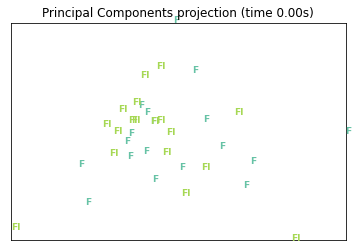

In [19]:
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
from time import time

#----------------------------------------------------------------------
# Random 2D projection using a random unitary matrix
# print("Computing random projection")
# rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
# X_projected = rp.fit_transform(X)
# plot_embedding(X_projected, "Random Projection")


#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Projection on to the first 2 linear discriminant components

print("Computing Linear Discriminant Analysis projection")
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible
t0 = time()
LDA_obj = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2)
X_lda = LDA_obj.fit_transform(X2, y)


fields = list(dfSelected.columns)
print("Main fields distinguishing classes")
scalings = np.abs(LDA_obj.scalings_)
print("\n  Class 1:")
for i, fieldIndex in enumerate(np.flip(np.argsort(scalings[:,0])), start=1):
    print("    {}. {} - {:.2f}".format(i, fields[fieldIndex], scalings[fieldIndex, 0]))

print("\n  Class 2:")
for i, fieldIndex in enumerate(np.flip(np.argsort(scalings[:,1])), start=1):
    print("    {}. {} - {:.2f}".format(i, fields[fieldIndex], scalings[fieldIndex, 1]))

print("\n  Class 3")
for i, fieldIndex in enumerate(np.flip(np.argsort(scalings[:,2])), start=1):
    print("    {}. {} - {:.2f}".format(i, fields[fieldIndex], scalings[fieldIndex, 2]))

# print("\n  Class 4:")
# for i, fieldIndex in enumerate(np.flip(np.argsort(scalings[:,3])), start=1):
#     print("    {}. {} - {:.2f}".format(i, fields[fieldIndex], scalings[fieldIndex, 3]))


plot_embedding(X_lda,
               "Linear Discriminant projection (time %.2fs)" %
               (time() - t0))



#----------------------------------------------------------------------
# Isomap projection dataset
# print("Computing Isomap embedding")
# t0 = time()
# X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
# print("Done.")
# plot_embedding(X_iso,
#                "Isomap projection (time %.2fs)" %
#                (time() - t0))


#----------------------------------------------------------------------
# Locally linear embedding dataset
# print("Computing LLE embedding")
# clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
#                                       method='standard')
# t0 = time()
# X_lle = clf.fit_transform(X)
# print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
# plot_embedding(X_lle,
#                "Locally Linear Embedding (time %.2fs)" %
#                (time() - t0))



#----------------------------------------------------------------------
# Modified Locally linear embedding dataset
# print("Computing modified LLE embedding")
# clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
#                                       method='modified')
# t0 = time()
# X_mlle = clf.fit_transform(X)
# print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
# plot_embedding(X_mlle,
#                "Modified Locally Linear Embedding (time %.2fs)" %
#                (time() - t0))


#----------------------------------------------------------------------
# HLLE embedding dataset
# print("Computing Hessian LLE embedding")
# clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
#                                       method='hessian')
# t0 = time()
# X_hlle = clf.fit_transform(X)
# print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
# plot_embedding(X_hlle,
#                "Hessian Locally Linear Embedding (time %.2fs)" %
#                (time() - t0))


#----------------------------------------------------------------------
# LTSA embedding dataset
# print("Computing LTSA embedding")
# clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
#                                       method='ltsa')
# t0 = time()
# X_ltsa = clf.fit_transform(X)
# print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
# plot_embedding(X_ltsa,
#                "Local Tangent Space Alignment (time %.2fs)" %
#                (time() - t0))


#----------------------------------------------------------------------
# MDS  embedding dataset
# print("Computing MDS embedding")
# clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
# t0 = time()
# X_mds = clf.fit_transform(X)
# print("Done. Stress: %f" % clf.stress_)
# plot_embedding(X_mds,
#                "MDS embedding (time %.2fs)" %
#                (time() - t0))


#----------------------------------------------------------------------
# Random Trees embedding dataset
# print("Computing Totally Random Trees embedding")
# hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
#                                        max_depth=5)
# t0 = time()
# X_transformed = hasher.fit_transform(X)
# pca = decomposition.TruncatedSVD(n_components=2)
# X_reduced = pca.fit_transform(X_transformed)

# plot_embedding(X_reduced,
#                "Random forest embedding (time %.2fs)" %
#                (time() - t0))

#----------------------------------------------------------------------
# Spectral embedding dataset
# print("Computing Spectral embedding")
# embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
#                                       eigen_solver="arpack")
# t0 = time()
# X_se = embedder.fit_transform(X)

# plot_embedding(X_se,
#                "Spectral embedding (time %.2fs)" %
#                (time() - t0))

#----------------------------------------------------------------------
# t-SNE embedding dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, perplexity=10, init='random', random_state=0, verbose=1, learning_rate=200, n_iter=10000)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding (time %.2fs)" %
               (time() - t0))




